About the data sets: http://opendata.cern.ch/record/545

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method

#import scipy.special as sf
import seaborn as sns
%matplotlib notebook


In [4]:
d3 = pd.read_csv('Data/Zmumu_Run2011A.csv')
d3.info()
minv_mu = np.sqrt(2*d3.pt1 * d3.pt2*(np.cosh(d3.eta1 - d3.eta2) - np.cos(d3.phi1 - d3.phi2)))
d3['M'] = minv_mu
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10583 entries, 0 to 10582
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     10583 non-null  int64  
 1   Event   10583 non-null  int64  
 2   pt1     10583 non-null  float64
 3   eta1    10583 non-null  float64
 4   phi1    10583 non-null  float64
 5   Q1      10583 non-null  int64  
 6   dxy1    10583 non-null  float64
 7   iso1    10583 non-null  float64
 8   pt2     10583 non-null  float64
 9   eta2    10583 non-null  float64
 10  phi2    10583 non-null  float64
 11  Q2      10583 non-null  int64  
 12  dxy2    10583 non-null  float64
 13  iso2    10583 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10583 entries, 0 to 10582
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     10583 non-null  int64  
 1   Event   10583 non-null 

<IPython.core.display.Javascript object>


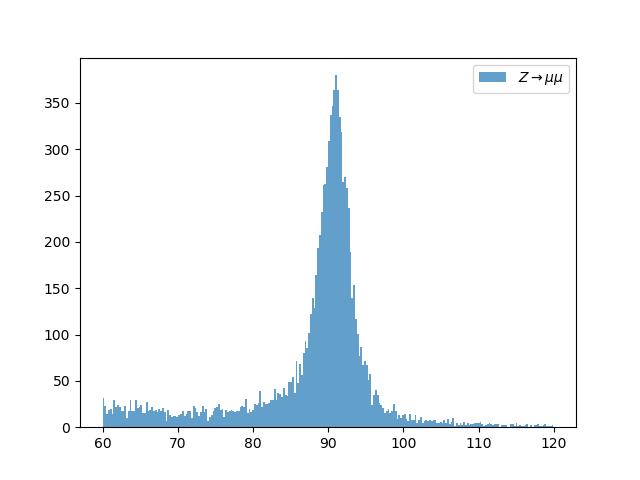

In [5]:
fig = plt.figure('Z decay')
plt.hist(minv_mu,bins=250,alpha = 0.7, label=r'$Z\rightarrow \mu\mu$')
plt.legend();

## Relativistic Breit–Wigner Distribution
Wikepedia: https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution

$f(E) = \frac{k}{(E^2 -M^2)^2 + M^2\Gamma^2}$, where

 * $\gamma$ = $\sqrt{M^2(M^2+\Gamma^2)}$
 * $k = \frac{2\sqrt{2}M\Gamma\gamma}{\pi\sqrt{M^2+\gamma}}$

In [6]:
def breitwigner_rel(E, gamma, M, a, b, A):
    little_gamma = np.sqrt(M**2*(M**2 + gamma**2))
    k = 2*np.sqrt(2)*M*gamma*little_gamma/(np.pi*np.sqrt(M**2 + little_gamma))
    return a*E + b + A*(k/((E**2 - M**2)**2 + M**2 * gamma**2))
    

<IPython.core.display.Javascript object>


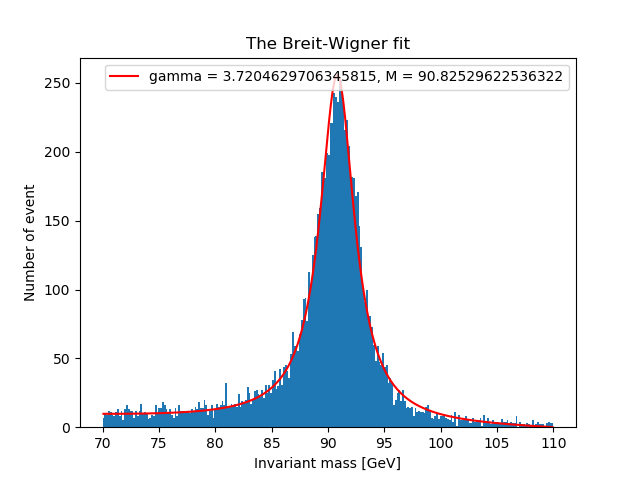

[  7.  10.   9.  12.  11.   9.   8.  11.  13.   8.  12.   5.  13.  16.
  13.  12.  12.   7.  12.   8.  12.  17.  10.  11.  10.   6.   7.   9.
   8.  16.  10.  14.  14.  18.  16.  13.  11.  13.   9.   7.  14.   8.
  16.  12.  12.  12.  11.  12.  10.  13.  11.  15.  13.  18.  14.  14.
  20.  16.   9.  12.  16.   7.  13.  17.  15.  16.  19.  16.  32.  14.
  15.  17.  16.  17.  15.  24.  15.  19.  18.  20.  29.  25.  17.  20.
  26.  27.  24.  22.  27.  21.  31.  25.  31.  25.  34.  41.  28.  30.
  42.  31.  44.  45.  41.  36.  53.  69.  59.  58.  55.  68.  78.  93.
  94.  77. 113. 104. 125. 138. 139. 155. 159. 185. 177. 181. 199. 198.
 221. 221. 243. 240. 236. 249. 252. 239. 216. 223. 204. 185. 182. 181.
 168. 171. 146. 131. 101.  91. 100.  79.  81.  73.  60.  48.  59.  47.
  45.  54.  44.  45.  32.  36.  33.  16.  20.  25.  27.  19.  27.  19.
  14.  15.  14.  15.   8.  14.  11.  12.  11.  11.  10.  15.  16.  12.
   7.   6.   8.  10.   6.   8.   8.   8.   7.   6.   5.   9.   4.  11.
   1. 

In [11]:
# Let's limit the fit near to the peak of the histogram.
lowerlimit = 70
upperlimit = 110
bins = 250

## Need to go over this with class
fig = plt.figure()
histogram_mu = plt.hist(minv_mu, bins=bins, range=(lowerlimit,upperlimit))

print(histogram_mu[0][:]) #bins counts
print(histogram_mu[1][:]) #mass values

y_mu = histogram_mu[0] #bin counts
x_mu = 0.5*( histogram_mu[1][0:-1] + histogram_mu[1][1:] ) #bin center
y_mu_error = np.sqrt(y_mu)
for i in range (len(y_mu)):
    if y_mu_error[i] == 0:
        y_mu_error[i] = 1.0
    else:
        y_mu_error[i] = y_mu_error[i]
##

initials = [2.5,91,-2, 200, 13000]
best_mu, covariance_mu = curve_fit(breitwigner_rel, x_mu, y_mu, p0=initials, sigma=y_mu_error)
error_mu = np.sqrt(np.diag(covariance_mu))        

plt.plot(x_mu, breitwigner_rel(x_mu, *best_mu), 'r-', label='gamma = {}, M = {}'.format(best_mu[0], best_mu[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of event')
plt.title('The Breit-Wigner fit')
plt.legend();

<IPython.core.display.Javascript object>


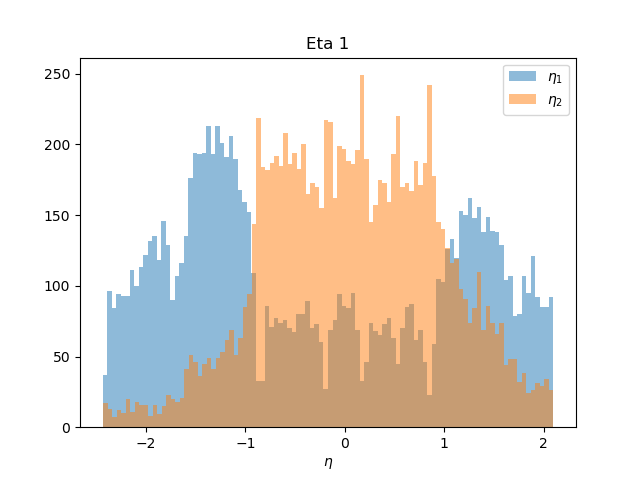

In [13]:
fig = plt.figure('eta')
plt.hist(d3.eta1,bins = 100,alpha = 0.5, label =r'$\eta_1$')
plt.hist(d3.eta2,bins = 100,alpha = 0.5, label = r'$\eta_2$')
plt.xlabel(r'$\eta$')
plt.title('Eta 1')
plt.legend();

In [14]:
# suggest two detector differences, and how to go about seperating them
#Homework will have type id
#barrel = d2[(d2['type1']=='EB') & (d2['type2']=='EB')]
#endcap = d2[(d2['type1']=='EE') & (d2['type2']=='EE')]
